In [35]:
import re
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

%matplotlib inline

In [2]:
# Global settings
sample_size = 1000

In [3]:
# Convert string to number
def string_to_number(value):
    n = re.sub(r"[,-]", "", value)
    return float(n) if n else None # 'None' will be used to identify missing values
# Conver string to date
def string_to_date(value):
    return datetime.strptime(value, '%b %d, %Y')

In [19]:
btc_price = pd.read_csv("../data/bitcoin_price.csv")
btc_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655 entries, 0 to 1654
Data columns (total 7 columns):
Date          1655 non-null object
Open          1655 non-null float64
High          1655 non-null float64
Low           1655 non-null float64
Close         1655 non-null float64
Volume        1655 non-null object
Market Cap    1655 non-null object
dtypes: float64(4), object(3)
memory usage: 90.6+ KB


In [20]:
# 'Volume' and 'Maket Cap' should be converted
parse_cols_number = ["Volume", "Market Cap"]
for col in parse_cols_number:
    btc_price[col] = btc_price[col].apply(lambda x: string_to_number(x))
# Date Parser
btc_price.Date = btc_price.Date.apply(lambda x: string_to_date(x))

In [21]:
print ("Shape = ", btc_price.shape)
btc_price.describe()

Shape =  (1655, 7)


,Open,High,Low,Close,Volume,Market Cap
count,1655.000000,1655.000000,1655.000000,1655.000000,1.412000e+03,1.655000e+03
mean,822.136127,845.812665,800.640906,826.285541,2.783246e+08,1.272435e+10
std,1108.245793,1147.157863,1077.408893,1119.053510,6.014815e+08,1.860357e+10
min,68.500000,74.560000,65.530000,68.430000,2.857830e+06,7.792550e+08
25%,263.850000,270.070000,260.030000,264.135000,2.163132e+07,3.754615e+09
50%,453.380000,458.200000,444.960000,453.380000,5.042405e+07,6.547850e+09
75%,743.485000,759.425000,731.785000,744.820000,1.220485e+08,1.061010e+10
max,7404.520000,7617.480000,7333.190000,7407.410000,4.653770e+09,1.233880e+11


In [22]:
print ("Missing volume = ", btc_price['Volume'].isnull().sum())
btc_price['Volume'] = btc_price['Volume'].fillna(method='ffill') # Replacing missing values

Missing volume =  243


In [26]:
btc_dataset = pd.read_csv("../data/bitcoin_dataset.csv")
btc_dataset.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2920.000000,2.920000e+03,2.920000e+03,2.899000e+03,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2.920000e+03,...,2.920000e+03,2920.000000,2920.000000,2920.000000,2.920000e+03,2920.000000,2920.000000,2.920000e+03,2.920000e+03,2.920000e+03
mean,471.825573,1.097689e+07,7.290293e+09,3.161043e+07,30700.727675,0.318071,0.362329,609.304687,7.129773,8.288403e+05,...,1.918640e+03,11.680069,171250.988014,92271.950000,5.985843e+07,85010.164384,56863.946233,1.486692e+06,1.955447e+05,1.123620e+08
std,934.964738,4.456721e+06,1.548875e+10,8.273604e+07,39266.422814,0.336005,0.840614,653.385566,5.045944,1.799654e+06,...,5.128409e+04,13.417497,186576.390606,97395.351614,7.459717e+07,97781.913869,65518.703160,2.280472e+06,2.697794e+05,2.402841e+08
min,0.000000,1.339450e+06,0.000000e+00,0.000000e+00,0.000000,0.000215,0.000000,1.000000,0.000000,2.435803e-06,...,0.000000e+00,0.000000,49.000000,49.000000,2.695800e+04,49.000000,49.000000,2.450000e+03,0.000000e+00,0.000000e+00
25%,5.176775,7.634838e+06,4.556363e+07,2.226471e+05,526.500000,0.020444,0.000000,46.000000,0.000000,1.026067e+01,...,1.215612e+00,3.407589,12042.250000,6713.000000,1.834960e+06,5641.500000,6033.750000,4.313462e+05,8.328650e+04,6.869000e+05
50%,213.115000,1.196590e+07,2.909919e+09,7.884278e+06,11733.000000,0.175100,0.000000,348.000000,7.766667,4.127249e+03,...,2.620644e+00,7.459337,95554.000000,58182.500000,2.672556e+07,42652.500000,30920.500000,1.025858e+06,1.709510e+05,3.070331e+07
75%,546.285000,1.481672e+07,7.178634e+09,2.444343e+07,48666.250000,0.597150,0.000000,1042.519231,9.852083,4.903844e+05,...,6.393794e+00,12.451011,302226.500000,159053.000000,9.165183e+07,154779.000000,94479.250000,1.938697e+06,2.544030e+05,1.097191e+08
max,7437.543317,1.666928e+07,1.239385e+11,1.267435e+09,140294.602454,1.046606,7.000000,2436.070588,47.733333,1.299979e+07,...,2.000000e+06,90.202095,733878.000000,369098.000000,2.694610e+08,361974.000000,286896.000000,4.599222e+07,5.825066e+06,2.396482e+09


/home/rodrigo/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


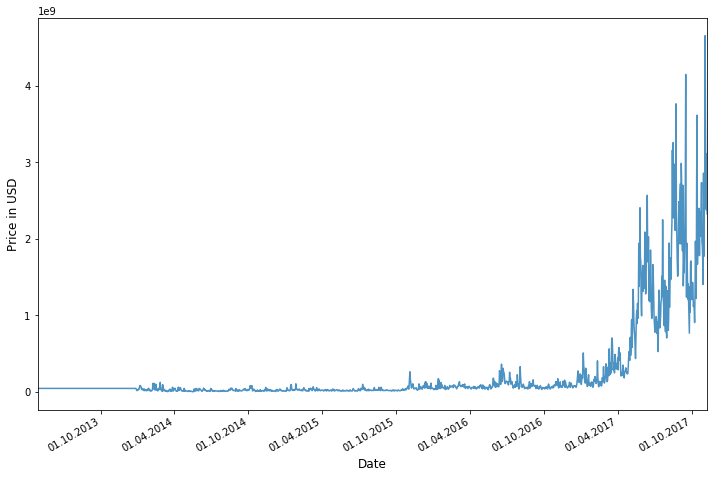

In [37]:
fig, ax = plt.subplots(figsize=(12,8))
btc_price['Date_mpl'] = btc_price['Date'].apply(lambda x: mdates.date2num(x))
sns.tsplot(btc_price.Volume.values, time=btc_price.Date_mpl.values, alpha=0.8, ax=ax)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%Y'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.show()